# **Problem Statement**

Identifying the varibles that are significant in predicting the demand of shared electric cycles of a leading indian startup in the Indian market and how well they describe the demands, by leveraging the data of total number of cycles in use at different date&time and analyzing the common factors that could affect the demand, like seasons, holidays, workingdays, weather, temperature, humidity and windspeed, thus helping the business make better decisions.

In [60]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [61]:
#importing data set

df = pd.read_csv('bike.csv')

In [62]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [63]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [64]:
df.shape

(10886, 12)

In [65]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset')
print(f'Each row represents the number of cycles in use at every hour with various factors affecting the demand')

There are 10886 rows and 12 columns in the dataset
Each row represents the number of cycles in use at every hour with various factors affecting the demand


In [66]:
#data overiew - non-null counts and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- Time series variable of type object - datetime
- Categorical variables of type int - season, holiday, workingday, weather
- Numerical(Continuous) variable of type int/float - temp, atemp, humidity, windspeed, casual, registered, count

In [67]:
#percentage of null values in each column

df.isnull().sum()*100/df.isnull().count()

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

There is no null value in the data set

# **Non-Graphical Analysis**

In [68]:
#number of unique values

df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [69]:
#converting column datetime type to pandas datetime64
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

- Range of datetime is 2011-01-01 00:00:00 - 2012-12-19 23:00:00 with one hour intervals

**Checking value counts of categorical columns**

In [70]:
#checking column season

df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

- season is divided into 4 categories 1-4; spring, summer, fall and winter respectively

In [71]:
#checking column holiday

df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

- holiday is a binary variable with 1 being a holiday and 0, not a holiday

In [72]:
#checking column workingday

df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

- workingday is a binary variable with 1 being a workingday and 0, not a workingday/ a weekend day

In [73]:
#checking column weather

df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

- weather is divided into 4 categories 1-4
    1. Clear, Few clouds, partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**Checking descriptive statistics of continuous columns**

In [74]:
#checking columns temp, atemp, humidity, windspeed, casual, registered and count

df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].describe().round(2)

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00
mean,20.23,23.66,61.89,12.80,36.02,155.55,191.57
std,7.79,8.47,19.25,8.16,49.96,151.04,181.14
min,0.82,0.76,0.00,0.00,0.00,0.00,1.00
25%,13.94,16.66,47.00,7.00,4.00,36.00,42.00
50%,20.50,24.24,62.00,13.00,17.00,118.00,145.00
75%,26.24,31.06,77.00,17.00,49.00,222.00,284.00
max,41.00,45.46,100.00,57.00,367.00,886.00,977.00


- Range of temp; 0.82-41 with an average of 20.23 deg Celsius
- Range of atemp; 0.76-45.46 with an average of 23.66 deg Celsius
- Range of humidity; 0-100 with an average of 61.89 %
- Range of windspeed; 8.16-57 with an average of 12.80 km/h
- Range of casual users; 0-367 with an average of 36 users/hour
- Range of registered users; 0-886 with an average of 156 users/hour
- Range of count of cycles/total users; 1-977 with an average of 192 users/hour

*There is a significant difference between the mean and median of users with mean being large indicates the existance of large values of outliers*

# **Visual Analysis**

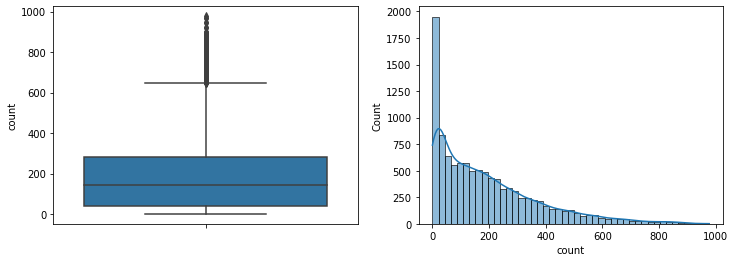

In [75]:
#checking distribution of column count
plt.figure(figsize=(12,4))

plt.subplot(121)
sns.boxplot(data=df, y='count')

plt.subplot(122)
sns.histplot(data=df, x='count', kde=True)
plt.show()

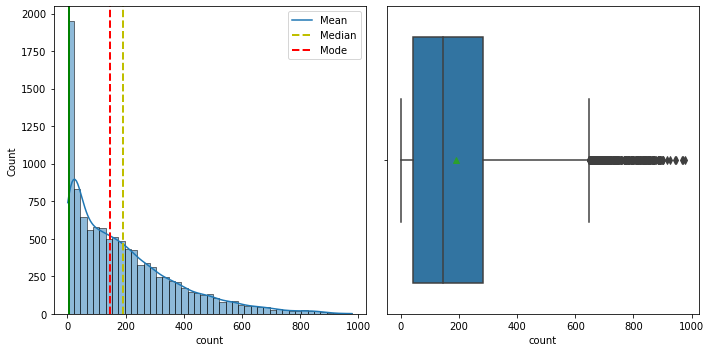

In [145]:
col_data=df['count']
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(col_data, kde=True, ax=ax[0])
ax[0].axvline(col_data.mean(), color='y', linestyle='--',linewidth=2)
ax[0].axvline(col_data.median(), color='r', linestyle='dashed', linewidth=2)
ax[0].axvline(col_data.mode()[0],color='g',linestyle='solid',linewidth=2)
ax[0].legend({'Mean':col_data.mean(),'Median':col_data.median(),'Mode':col_data.mode()})
sns.boxplot(x=col_data, showmeans=True, ax=ax[1])
plt.tight_layout()

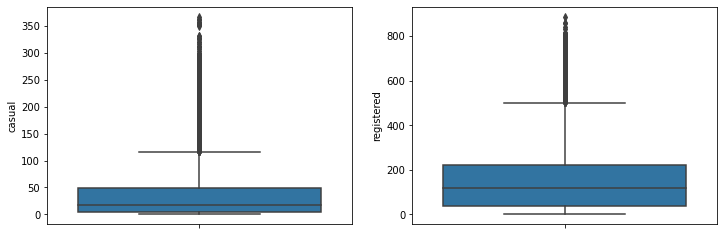

In [76]:
#checking distribution of columns casual and registered
plt.figure(figsize=(12,4))

plt.subplot(121)
sns.boxplot(data=df, y='casual')

plt.subplot(122)
sns.boxplot(data=df, y='registered')
plt.show()

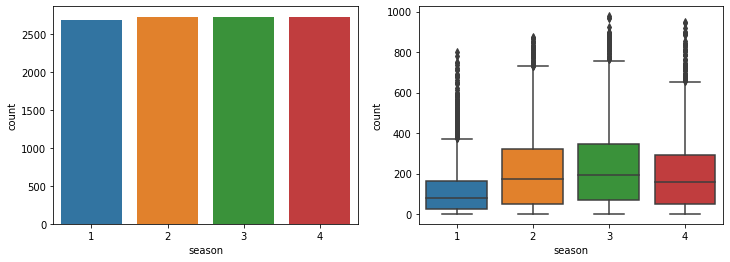

In [77]:
#checking column season
plt.figure(figsize=(12,4))

plt.subplot(121)
sns.countplot(data=df, x='season')

#season vs count
plt.subplot(122)
sns.boxplot(data=df, y='count', x='season')
plt.show()

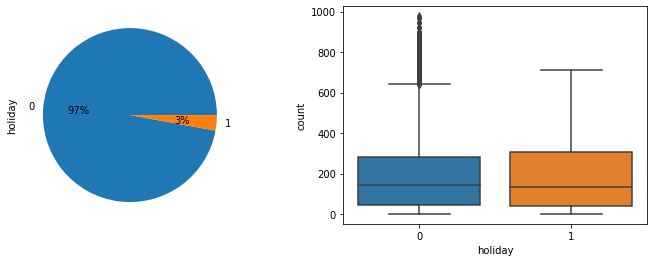

In [78]:
#checking column holiday
plt.figure(figsize=(12,4))

plt.subplot(121)
df['holiday'].value_counts().plot(kind='pie', autopct='%.f%%')

#holiday vs count
plt.subplot(122)
sns.boxplot(data=df, y='count', x='holiday')
plt.show()

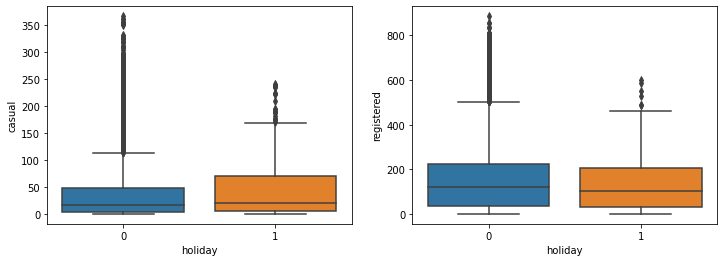

In [79]:
#checking column holiday with casual vs registered
plt.figure(figsize=(12,4))

plt.subplot(121)
sns.boxplot(data=df, y='casual', x='holiday')

plt.subplot(122)
sns.boxplot(data=df, y='registered', x='holiday')
plt.show()

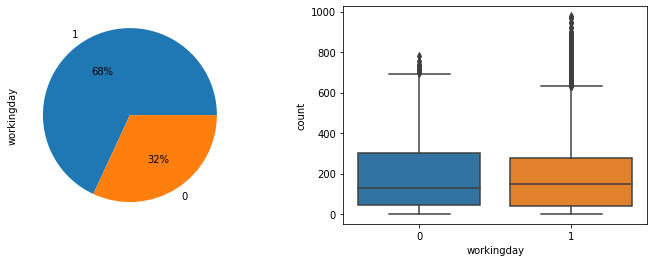

In [80]:
#checking column workingday
plt.figure(figsize=(12,4))

plt.subplot(121)
df['workingday'].value_counts().plot(kind='pie', autopct='%.f%%')

#workingday vs count
plt.subplot(122)
sns.boxplot(data=df, y='count', x='workingday')
plt.show()

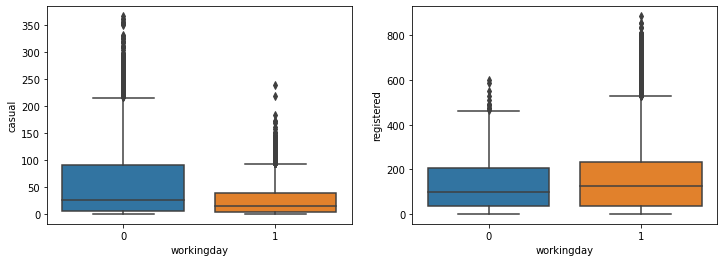

In [81]:
#checking column workingday with casual vs registered users
plt.figure(figsize=(12,4))

plt.subplot(121)
sns.boxplot(data=df, y='casual', x='workingday')

plt.subplot(122)
sns.boxplot(data=df, y='registered', x='workingday')
plt.show()

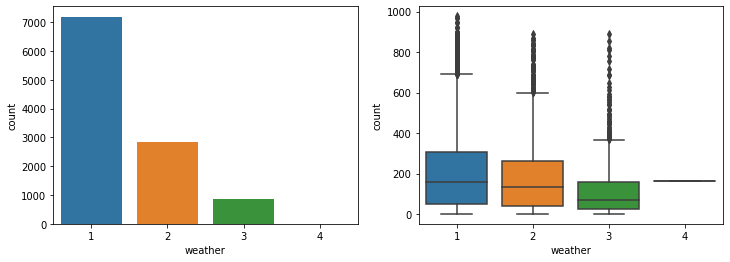

In [82]:
#checking column weather
plt.figure(figsize=(12,4))

plt.subplot(121)
sns.countplot(data=df, x='weather')

#weather vs count
plt.subplot(122)
sns.boxplot(data=df, y='count', x='weather')
plt.show()

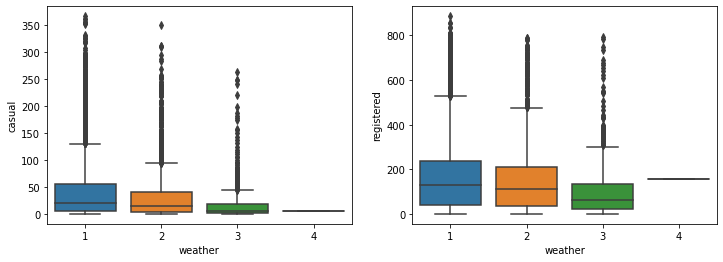

In [83]:
#checking column weather
plt.figure(figsize=(12,4))

plt.subplot(121)
sns.boxplot(data=df, y='casual', x='weather')

#weather vs count
plt.subplot(122)
sns.boxplot(data=df, y='registered', x='weather')
plt.show()

**Weather Outlier**

In [84]:
df[df['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


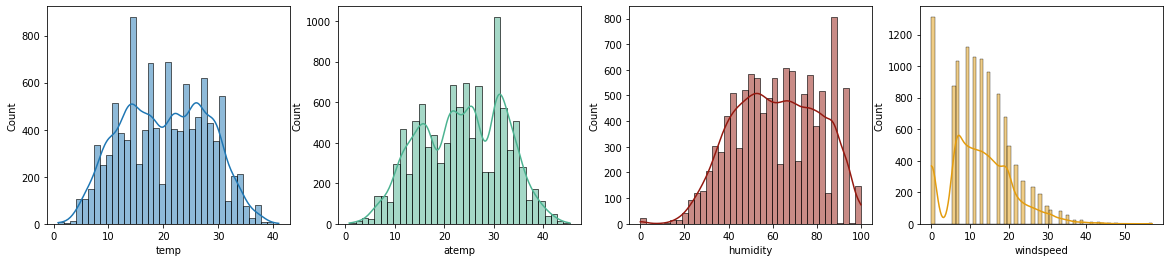

In [85]:
#distribution of continous variables
plt.figure(figsize=(20,4))

#temp
plt.subplot(141)
sns.histplot(data=df, x='temp', kde=True)

#atemp
plt.subplot(142)
sns.histplot(data=df, x='atemp', color='#4CB391', kde=True)

#humidity
plt.subplot(143)
sns.histplot(data=df, x='humidity', color='#94180f', kde=True)

#windspeed
plt.subplot(144)
sns.histplot(data=df, x='windspeed', color='#e39c0e', kde=True)
plt.show()

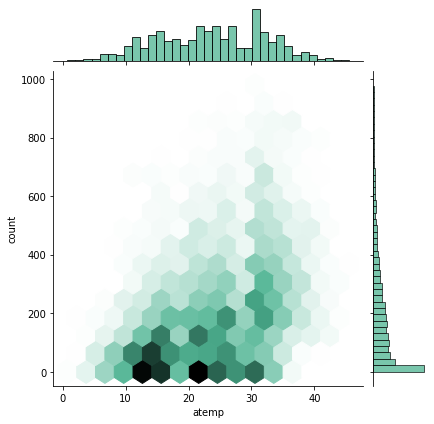

In [86]:
#atemp vs count
sns.jointplot(data=df, y='count', x='atemp', kind='hex', color='#4CB391', joint_kws=dict(gridsize=15))
plt.show()

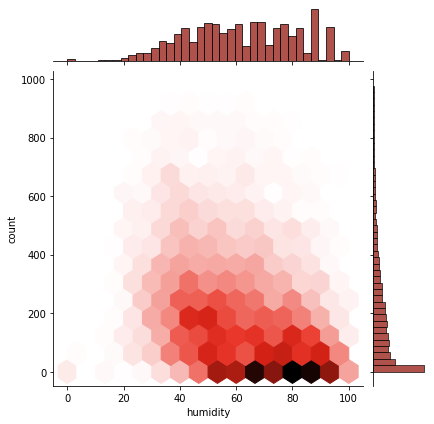

In [87]:
#humidity vs count
sns.jointplot(data=df, y='count', x='humidity', kind='hex', color='#94180f', joint_kws=dict(gridsize=15))
plt.show()

### **Datetime vs Count**

In [88]:
df.drop(index=5631)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [89]:
#feature: month
#feature: year
#feature: hour
#feature: week

df['month'] = df.datetime.dt.month
df['year'] = df.datetime.dt.year
df['hour'] = df.datetime.dt.hour
#Monday=0, Sunday=6
df['week'] = df.datetime.dt.weekday

In [90]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour,week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011,4,5


In [91]:
df.groupby('hour')['count'].mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

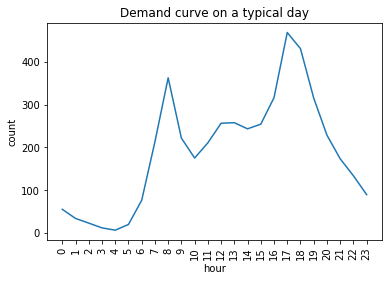

In [92]:
plt.xticks(df.groupby('hour')['count'].mean().index, rotation=90)
plt.title('Demand curve on a typical day')
sns.lineplot(data=df.groupby('hour')['count'].mean())
plt.show()

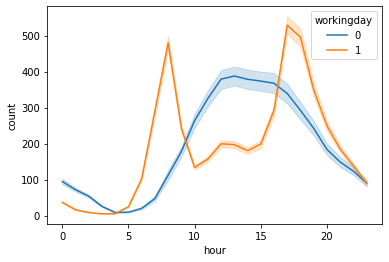

In [141]:
sns.lineplot(data=df, x='hour', y='count', hue='workingday')
plt.show()

In [93]:
df[df['season']==1]['month'].value_counts()

2    901
3    901
1    884
Name: month, dtype: int64

In [94]:
df.groupby('season')['month'].value_counts()

season  month
1       2        901
        3        901
        1        884
2       5        912
        6        912
        4        909
3       7        912
        8        912
        9        909
4       12       912
        10       911
        11       911
Name: month, dtype: int64

In [95]:
df.groupby('week')['count'].mean()

week
0    190.390716
1    189.723847
2    188.411348
3    197.296201
4    197.844343
5    196.665404
6    180.839772
Name: count, dtype: float64

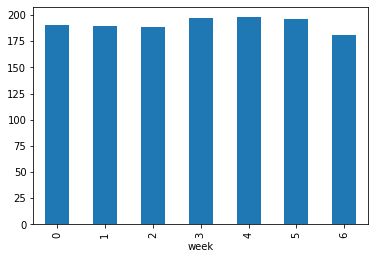

In [96]:
df.groupby('week')['count'].mean().plot(kind='bar')
plt.show()

### **Correlation**

In [97]:
#correlation between casual and registered variables

df[['casual', 'registered']].corr(method='spearman')

,casual,registered
casual,1.000000,0.775785
registered,0.775785,1.000000


In [98]:
#correlation between continuous variables and count

df_corr = df[['weather', 'atemp', 'humidity', 'windspeed', 'count']].corr(method='spearman')
df_corr

,weather,atemp,humidity,windspeed,count
weather,1.000000,-0.061933,0.399492,-0.006648,-0.114133
atemp,-0.061933,1.000000,-0.042028,-0.036350,0.406562
humidity,0.399492,-0.042028,1.000000,-0.324447,-0.354049
windspeed,-0.006648,-0.036350,-0.324447,1.000000,0.135777
count,-0.114133,0.406562,-0.354049,0.135777,1.000000


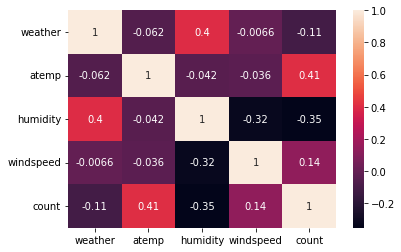

In [99]:
sns.heatmap(df_corr, annot=True)
plt.show()

## **Observations based on EDA**

1. Range of datetime is 2011-01-01 00:00:00 - 2012-12-19 23:00:00 with one hour intervals<br><br>
2. Almost equal number of observaions are available for all 4 seasons<br><br>
3. Only 3% of data belong to holidays<br><br>
4. 68% of data collected account for working days<br><br>
5. Only one datapoint is available for extreme weather category -4(Heavy Rain,Ice Pallets,Thunderstorm,Mist OR Snow,Fog)<br><br>
6. 66% of the days have a clear or partly cloudy weather (category -1)<br><br>
7. Median temperature is 20.50 deg Celsius and 50% of the time temperature is between 14-26 deg Celsius<br><br>
8. Median humidity is 62% and 50% of the time humidity falls between 47-77%<br><br>
9. Average wind speed is 13km/h and less than 17km/h, 75% of the time<br><br>
10. Over 75% of the time, the number of casual user don't exceed 50<br><br>
11. Median value of registered users is 118 and half of the time, the number of registered users are in between 36-222<br><br>
12. Median number cycles in use at a time is 145

## **Insights based on above analysis**

1. People tend to use cycles relatively less in spring and most in summer and fall<br><br>
2. Overall, no significant difference is observed in demand neither on holidays/non-holidays nor workingdays/weekends<br><br>
3. Casual users tend to use cycles a little more on holidays and weekends<br><br>
4. Demand for cycles decrease as the weather gets more and more extreme<br><br>
5. Cycle demand is highly correlated with temperature indicates people tend to use cycles less when the temperature is very low<br><br>
6. Demand is inversely related to humidity<br><br>
7. A small correlation is found between windspeed and number of users<br><br>
8. The demand curve on a typical day is observed to have two peaks, the highest between 5-7 in the evening and another peak, in the morning 8-9<br><br>
9. Demand is almost the same throughout the week<br><br>

# **Statistical Tests**

## **1. Check whether working Day has an effect on number of electric cycles rented**

*Null Hypothesis*
- H0 - Working day has no effect on the number of cycles rented
    - Mean count on working days = Mean count on non-working days
    - Xwd = Xnwd

*Alternate Hypothesis*
- H1 - Working day has some effect on the number of cycles rented
    - Mean count on working days ≠ Mean count on non-working days
    - Xwd ≠ Xnwd
    
*Hypothesis Test*
- 2- Independent Sample, 2-Tailed T-Test
    - Sample 1 - Cycles rented on working days
    - Sample 2 - Cycles rented on non-working days
    - *Finite population mean & std and unknown population variance*
    
*Significance level*
- alpha = 5%

*Test Statistic*
- Tt = (x1 - x2) / sqrt(s1^2/n1 + s2^2/n2)
    - T-distribution(dof)

In [100]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [101]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

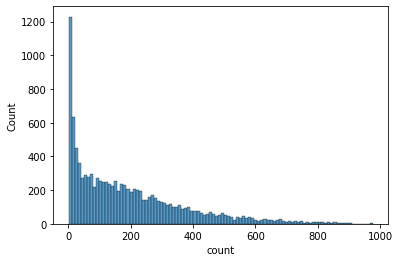

In [102]:
sns.histplot(data=df, x='count', bins=100)
plt.show()

### **Outlier treatment**

In [103]:
#remove extreme values as we dont want them to impact means 
Q1 = df['count'].quantile(0.25)
Q3 = df['count'].quantile(0.75)
IQR = Q3 - Q1
low_lt = max(min(df['count']), Q1 - 1.5*IQR)
up_lt = min(max(df['count']), Q3 + 1.5*IQR)
print(low_lt, up_lt)

1 647.0


In [104]:
df_new = df[df['count'] <= up_lt]
df_new['count'].describe()

count    10586.000000
mean       175.717079
std        156.360023
min          1.000000
25%         40.000000
50%        138.000000
75%        270.000000
max        647.000000
Name: count, dtype: float64

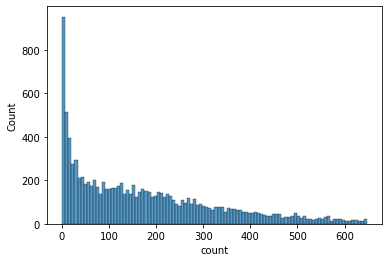

In [105]:
sns.histplot(data=df_new, x='count', bins=100)
plt.show()

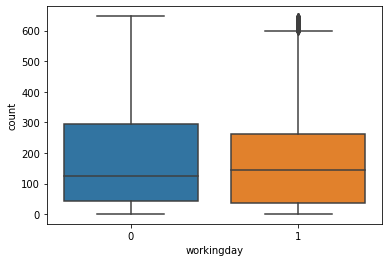

In [106]:
sns.boxplot(data=df_new, y='count', x='workingday')
plt.show()

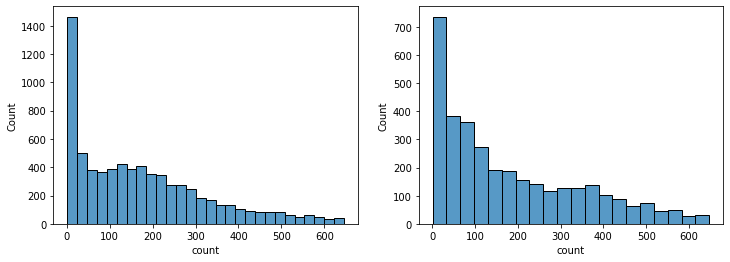

In [107]:
#split the data
df_wday = df_new[df_new['workingday'] == 1]
df_non_wday = df_new[df_new['workingday'] == 0]

plt.figure(figsize=(12,4))

plt.subplot(121)
sns.histplot(data=df_wday, x='count')

plt.subplot(122)
sns.histplot(data=df_non_wday, x='count')
plt.show()

In [108]:
#2 sample t-test
def t_test(data1, data2, alpha):   

    dof = np.size(data1) + np.size(data2) - 2
    print('Degrees of freedom:', dof)
    
    #test statistic and p-value
    t_stat, p_val = stats.ttest_ind(data1, data2)
    print('Test Statistic:', abs(t_stat))
    print('P value:', p_val)

    t_val = round(stats.t.isf(q = alpha, df = dof), 2)
    print('Critical Value of t-test:', t_val)
    print('Significance level:', alpha)
    print()

    if abs(t_stat) < t_val :
        print('test statistic < critical value of test so, fail to reject the null hypothesis ')
    else:
        print('test statistic > critical value of so, reject the null hypothesis ')

In [109]:
t_test(df_wday['count'], df_non_wday['count'], 0.05)

Degrees of freedom: 10584
Test Statistic: 2.5748856400481515
P value: 0.010040780184497066
Critical Value of t-test: 1.64
Significance level: 0.05

test statistic > critical value of so, reject the null hypothesis 


### **Inference from the analysis**

- Test Statistic: 2.57
- Critical value of test: 1.64
- P value: 0.01

*As the test statistic is greater than the critical value of the test, we can reject the null hypothesis at 5% level of significance*<br>
*As the p-value is smaller than the test significance level, we can reject the null hypothesis*

**Conclusion - Working day has some effect on the number of electric cycles rented**

## **2. Check whether weather is dependent on season**

**Note: As there is only one data point for weather 4, test is performed for weather conditions 1,2&3**

*Null Hypothesis*
- H0 - Weather is independent on season
    - Proportion of all 3 weathers are same on all seasons

*Alternate Hypothesis*
- H1 - Weather is dependent on season
    - Proportion of different weathers are different across season
    
*Hypothesis Test*
- 4x3 Chi-square test of independence
    - Rows: Season - 1, 2, 3 & 4
    - Cols: Weather - 1, 2 & 3
    - *Non-parametric test*
    
*Significance level*
- alpha = 5%

*Test Statistic*
- Tχ2 = Σ (Oi - Ei) / Ei
    - Chi-square distribution(dof)

In [110]:
df[['season','weather']]

,season,weather
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
10881,4,1
10882,4,1
10883,4,1
10884,4,1


In [111]:
df[df['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour,week
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,1,2012,18,0


In [112]:
df_chi = df.drop(index=5631)
contingency = pd.crosstab(df_chi['season'], df_chi['weather'])

In [113]:
#Observed frequency
pd.crosstab(df_chi['season'], df_chi['weather'], margins=True)

weather,1,2,3,All
season,,,,
1,1759,715,211,2685
2,1801,708,224,2733
3,1930,604,199,2733
4,1702,807,225,2734
All,7192,2834,859,10885


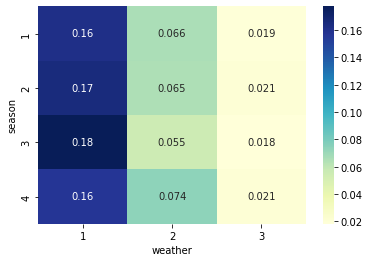

In [114]:
sns.heatmap(pd.crosstab(df_chi['season'], df_chi['weather'], normalize=True), annot=True, cmap="YlGnBu")
plt.show()

In [115]:
#Chi-square test of independence
def chis_test(contingency, alpha):   

    #test statistic and p-value
    t_stat, p_val, dof, exp_val = stats.chi2_contingency(contingency)
    
    print('Observed frequency:', '\n', contingency.values, '\n')
    print('Expected frequency:', '\n', exp_val, '\n')
    print('Degrees of freedom:', dof)
    print('Test Statistic:', t_stat)
    print('P value:', p_val)

    t_val = round(stats.chi2.ppf(q = 1-alpha, df = dof), 2)
    print('Critical Value of Chi-square test:', t_val)
    print('Significance level:', alpha)
    print()

    if abs(t_stat) < t_val :
        print('test statistic < critical value of test so, fail to reject the null hypothesis ')
    else:
        print('test statistic > critical value of test so, reject the null hypothesis ')

In [116]:
chis_test(contingency, 0.05)

Observed frequency: 
 [[1759  715  211]
 [1801  708  224]
 [1930  604  199]
 [1702  807  225]] 

Expected frequency: 
 [[1774.04869086  699.06201194  211.8892972 ]
 [1805.76352779  711.55920992  215.67726229]
 [1805.76352779  711.55920992  215.67726229]
 [1806.42425356  711.81956821  215.75617823]] 

Degrees of freedom: 6
Test Statistic: 46.10145731073249
P value: 2.8260014509929343e-08
Critical Value of Chi-square test: 12.59
Significance level: 0.05

test statistic > critical value of test so, reject the null hypothesis 


### **Inference from the analysis**

- Test Statistic: 46.10
- Critical value of test: 12.59
- P value: 2.8e-08

*As the test statistic is greater than the critical value of the test, we can reject the null hypothesis at 5% level of significance*<br>
*As the p-value is smaller than the test significance level, we can reject the null hypothesis*

**Conclusion - Weather has some dependency on season**

## **3. Check whether no. of cycles rented similar or different in different seasons**

*Null Hypothesis*
- H0 - Average number of cycles rented are similar in all seasons
    - There is no difference between mean count in different seasons

*Alternate Hypothesis*
- H1 - Average number of cycles rented are different in different seasons
    - There is some difference between mean count across seasons
    
*Hypothesis Test*
- One way ANOVA of comparison of means
    - Independent variable: seasons- 1, 2, 3 & 4
    - Dependent variable: Mean count of cycles rented
    - Assumptions:
        1. Each group's data are gaussian distributed
        2. Variance of each group is the same
        3. Observations are independent of one another
    
*Significance level*
- alpha = 5%

*Test Statistic*
- f = MSB/MSW
    - F-distribution(k-1, n-k)
        - k: Number of seasons
        - m: Number of cycles rented per season
        - n = m*k

In [117]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

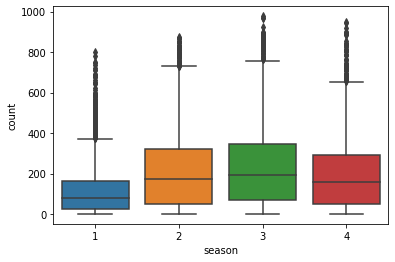

In [118]:
sns.boxplot(data=df, y='count', x='season')
plt.show()

In [119]:
#Splitting data into different groups

df_s1 = np.random.choice(df[df['season']==1]['count'], size=2500)
df_s2 = np.random.choice(df[df['season']==2]['count'], size=2500)
df_s3 = np.random.choice(df[df['season']==3]['count'], size=2500)
df_s4 = np.random.choice(df[df['season']==4]['count'], size=2500)

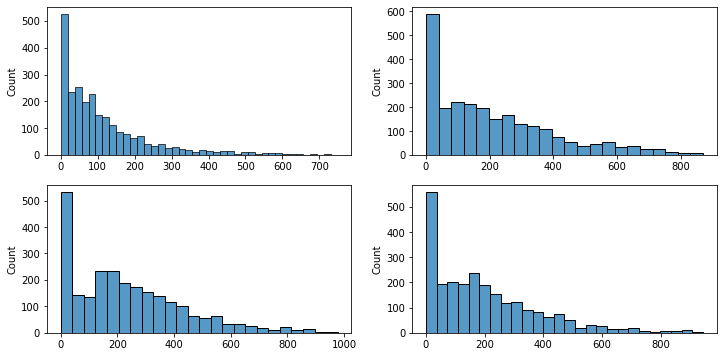

In [120]:
plt.figure(figsize=(12,6))

plt.subplot(221)
sns.histplot(data=df_s1)
plt.subplot(222)
sns.histplot(data=df_s2)
plt.subplot(223)
sns.histplot(data=df_s3)
plt.subplot(224)
sns.histplot(data=df_s4)

plt.show()

In [121]:
#Tranforming data to normal distribution using boxcox transform
df_s1_trans = stats.boxcox(df_s1)[0]
df_s2_trans = stats.boxcox(df_s2)[0]
df_s3_trans = stats.boxcox(df_s3)[0]
df_s4_trans = stats.boxcox(df_s4)[0]

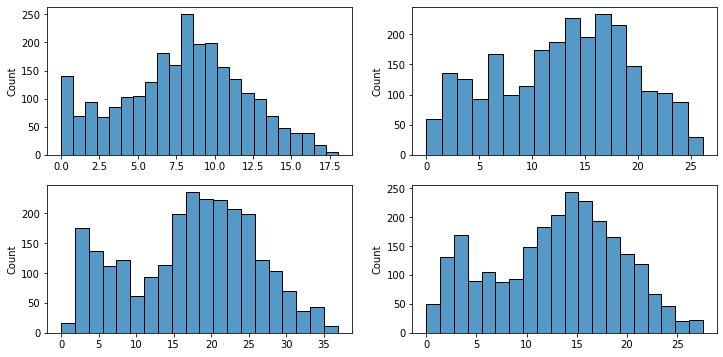

In [122]:
plt.figure(figsize=(12,6))

plt.subplot(221)
sns.histplot(data=df_s1_trans)
plt.subplot(222)
sns.histplot(data=df_s2_trans)
plt.subplot(223)
sns.histplot(data=df_s3_trans)
plt.subplot(224)
sns.histplot(data=df_s4_trans)

plt.show()

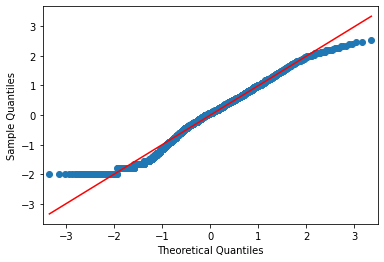

In [123]:
#QQ Plot for normality check
sm.qqplot(df_s1_trans, fit=True, line='r')
plt.show()

In [124]:
#Levene's test for equality of variance
stats.levene(df_s1, df_s2, df_s3, df_s4)

LeveneResult(statistic=182.1159801603729, pvalue=5.632170207150126e-115)

**Transformation of data did not make the distribution gaussian<br>
  Levene's transform shows extremely low p-value indicates, variances are not equal even at 0.1% significance level<br>
  however, proceeding with anova anyways**

In [125]:
#Test statistic and p-value
stats.f_oneway(df_s1, df_s2, df_s3, df_s4)

F_onewayResult(statistic=224.92741798176974, pvalue=3.2336983644466415e-141)

In [126]:
#Critical value of test statistic - parameters: q, dfn, dfd
stats.f.ppf(1-0.05, 3, 9996)

2.6057974276112974

### **Inference from the analysis**

- Test Statistic: 210.79
- Critical value of test: 2.61
- P value: 1.4e-132

*As the test statistic is greater than the critical value of the test, we can reject the null hypothesis at 5% level of significance*<br>
*As the p-value is smaller than the test significance level, we can reject the null hypothesis*

**Conclusion - Average number of cycles rented are different in different seasons**

## **4. Check whether no. of cycles rented similar or different in different weather**

**Note:As there is only one data point for weather 4, test is performed for weather conditions 1,2&3**

*Null Hypothesis*
- H0 - Average number of cycles rented are similar in all weather conditions
    - There is no difference between mean count in different weather

*Alternate Hypothesis*
- H1 - Average number of cycles rented are different in different weather conditions
    - There is some difference between mean count across different weather
    
*Hypothesis Test*
- One way ANOVA of comparison of means
    - Independent variable: weather- 1, 2 & 3
    - Dependent variable: Mean count of cycles rented
    - Assumptions:
        1. Each group's data are gaussian distributed
        2. Variance of each group is the same
        3. Observations are independent of one another
    
*Significance level*
- alpha = 5%

*Test Statistic*
- f = MSB/MSW
    - F-distribution(k-1, n-k)
        - k: Number of weather conditions
        - m: Number of cycles rented per weather condition
        - n = m*k

In [127]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [128]:
df[df['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour,week
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,1,2012,18,0


In [129]:
df_an = df.drop(index=5631)

In [130]:
df_an['weather'].value_counts()

1    7192
2    2834
3     859
Name: weather, dtype: int64

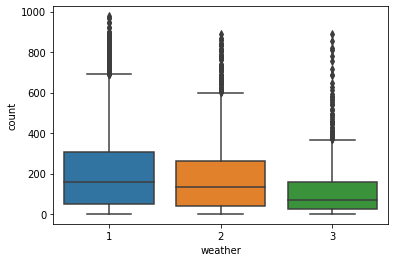

In [131]:
sns.boxplot(data=df_an, y='count', x='weather')
plt.show()

In [132]:
#Splitting data into different groups

df_s1 = np.random.choice(df[df['weather']==1]['count'], size=800)
df_s2 = np.random.choice(df[df['weather']==2]['count'], size=800)
df_s3 = np.random.choice(df[df['weather']==3]['count'], size=800)

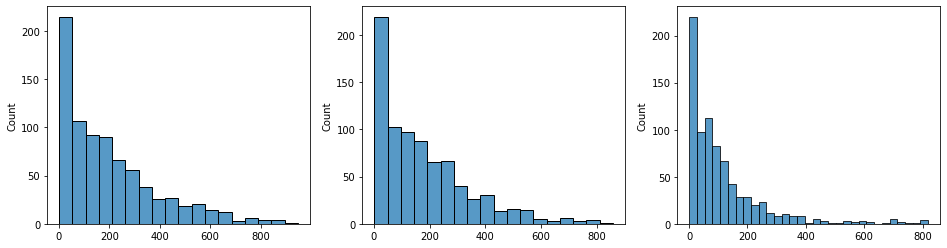

In [133]:
plt.figure(figsize=(16,4))

plt.subplot(131)
sns.histplot(data=df_s1)
plt.subplot(132)
sns.histplot(data=df_s2)
plt.subplot(133)
sns.histplot(data=df_s3)

plt.show()

In [134]:
#Tranforming data to normal distribution using boxcox transform
df_s1_trans = stats.boxcox(df_s1)[0]
df_s2_trans = stats.boxcox(df_s2)[0]
df_s3_trans = stats.boxcox(df_s3)[0]

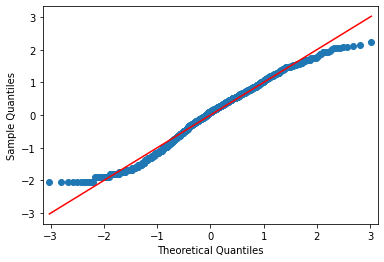

In [135]:
#QQ Plot
sm.qqplot(df_s1_trans, fit=True, line='r')
plt.show()

In [136]:
#Shapiro-Wilk test for normality
stats.shapiro(df_s1_trans)

ShapiroResult(statistic=0.9816222190856934, pvalue=1.7576606836655628e-08)

**Extremely low p-value from Shapiro-Wilk test shows that the distribution is not normal even at 0.1% level of significance<br>
  Transformation of data did not make the distribution gaussian<br>
  Levene's transform shows extremely low p-value indicates, variances are not equal even at 0.1% significance level<br>
  however, proceeding with anova anyways**

In [137]:
#Test statistic and p-value
stats.f_oneway(df_s1, df_s2, df_s3)

F_onewayResult(statistic=55.52491746497069, pvalue=2.67762050487265e-24)

In [138]:
#Critical value of test, Parameters: q, dfn, dfd
stats.f.ppf(1-0.05, 2, 2397)

2.999479413275762

### **Inference from the analysis**

- Test Statistic: 62.431
- Critical value of test: 2.999
- P value: 3.7e-27

*As the test statistic is greater than the critical value of the test, we can reject the null hypothesis at 5% level of significance*<br>
*As the p-value is smaller than the test significance level, we can reject the null hypothesis*

**Conclusion - Average number of cycles rented are different in different weather conditions**

## **Insights from above statistical tests**

1. Working day has some effect on the number of electric cycles rented if some outliers are removed from the sample<br><br>
2. Weather has some dependency on season<br><br>
3. Average number of cycles rented are different in different seasons<br><br>
4. Average number of cycles rented are different in different weather conditions<br><br>

## **Factors that are significant in predicting the demand**

- Season: People tend to use cycles more in Summer and Fall and least in Spring
- Weather: The demand for cycles decreases as the weather gets more and more extreme
- Temperature: Cycle demands fall if the temperature outside is too cold
- Humidity: Usage is inversely proportional to humidity, as humidity rises, demand falls

## **Recommendations**

1. Some of the cycles could be shipped to other places in spring as the demand tend to be the lowest<br><br>
2. Some incentives can be provided to the registered users on holidays and weekends as the usage by casual users increase these days<br><br>
3. Usage price can be reduced when the weather gets extreme and the price should be increased if the weather is clear/partly cloudy<br><br>
4. Converting more casual users could improve revenue as the usage by registered users tend to be more consistent at changing day-to-day conditions<br><br>
5. Dynamic pricing could be implemented on hourly basis as the demand curve shows two peaks, one at 8-9 in the morning, other at 5-7 in the evening<br><br>
6. There is a scope for experiment with pricing based on temperature and humidity as the former is directly and latter one is inversely related to demand<br><br>